In [143]:
import yfinance as yf
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from dash import Dash,dcc,html

In [144]:
ticker = "RELIANCE.NS"
start_date="2023-01-01"
end_date="2025-01-01"

In [145]:
stock_data=yf.download(tickers=ticker,start=start_date,end=end_date)

[*********************100%***********************]  1 of 1 completed


In [146]:
stock_data.head()

Price,Close,High,Low,Open,Volume
Ticker,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS
Date,,,,,
2023-01-02,1172.422974,1173.833955,1159.815273,1160.634533,5316175
2023-01-03,1163.843262,1171.102956,1159.633191,1167.484486,7658932
2023-01-04,1146.320068,1165.664004,1144.249103,1163.820578,9264891
2023-01-05,1144.271851,1154.444524,1139.697597,1148.573058,13637099
2023-01-06,1154.672119,1159.701571,1146.206348,1150.006849,6349597


In [147]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 491 entries, 2023-01-02 to 2024-12-31
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   (Close, RELIANCE.NS)   491 non-null    float64
 1   (High, RELIANCE.NS)    491 non-null    float64
 2   (Low, RELIANCE.NS)     491 non-null    float64
 3   (Open, RELIANCE.NS)    491 non-null    float64
 4   (Volume, RELIANCE.NS)  491 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 23.0 KB


In [148]:
stock_data.columns

MultiIndex([( 'Close', 'RELIANCE.NS'),
            (  'High', 'RELIANCE.NS'),
            (   'Low', 'RELIANCE.NS'),
            (  'Open', 'RELIANCE.NS'),
            ('Volume', 'RELIANCE.NS')],
           names=['Price', 'Ticker'])

Since it has multiIndex it should be fixed and addressed 

In [149]:
stock_data.columns=[col[0] for col in stock_data.columns]
print(stock_data.head())

                  Close         High          Low         Open    Volume
Date                                                                    
2023-01-02  1172.422974  1173.833955  1159.815273  1160.634533   5316175
2023-01-03  1163.843262  1171.102956  1159.633191  1167.484486   7658932
2023-01-04  1146.320068  1165.664004  1144.249103  1163.820578   9264891
2023-01-05  1144.271851  1154.444524  1139.697597  1148.573058  13637099
2023-01-06  1154.672119  1159.701571  1146.206348  1150.006849   6349597


Calculating daily returns 

In [150]:
stock_data['Return']=stock_data['Close'].pct_change()

In [151]:
#defining stock states(Up,Down,Stable)
def get_state(return_value):
    if return_value > 0.005:
        return "Up"
    elif return_value < -0.005:
        return "Down"
    else :
        return "Stable"

In [152]:
stock_data["state"]=stock_data['Return'].apply(get_state)

In [153]:
stock_data['state']

Date
2023-01-02    Stable
2023-01-03      Down
2023-01-04      Down
2023-01-05    Stable
2023-01-06        Up
               ...  
2024-12-24    Stable
2024-12-26      Down
2024-12-27    Stable
2024-12-30      Down
2024-12-31    Stable
Name: state, Length: 491, dtype: object

In [154]:
stock_data.head()

,Close,High,Low,Open,Volume,Return,state
Date,,,,,,,
2023-01-02,1172.422974,1173.833955,1159.815273,1160.634533,5316175,NaN,Stable
2023-01-03,1163.843262,1171.102956,1159.633191,1167.484486,7658932,-0.007318,Down
2023-01-04,1146.320068,1165.664004,1144.249103,1163.820578,9264891,-0.015056,Down
2023-01-05,1144.271851,1154.444524,1139.697597,1148.573058,13637099,-0.001787,Stable
2023-01-06,1154.672119,1159.701571,1146.206348,1150.006849,6349597,0.009089,Up


Checking for NAN values

In [155]:
stock_data['state'].isna().sum()

0

In [156]:
#Line chart 
fig = px.line(stock_data, x=stock_data.index,y="Close",title="Reliance Stock Price Movement",
labels={"Close":"Stock Price (INR)"},template="plotly_dark")

fig.add_trace(go.Scatter(x=stock_data.index, y=stock_data['Close'],
                         mode='markers', marker=dict(color=np.where(stock_data['state']=='Up', 'green', 
                                                                    np.where(stock_data['state']=='Down', 'red', 'blue'))),
                         name="Stock Movement States"))


fig.show()


In [157]:
states = ['Up', 'Down', 'Stable']
transition_matrix = pd.DataFrame(0, index=states, columns=states)

In [158]:
#counting transistions 
for i in range(len(stock_data) - 1):
    current_state = stock_data['state'].iloc[i]
    next_state = stock_data['state'].iloc[i + 1]
    transition_matrix.loc[current_state, next_state] += 1

In [159]:
transition_matrix = transition_matrix.div(transition_matrix.sum(axis=1), axis=0)

In [160]:
print("Transition Matrix:\n", transition_matrix)


Transition Matrix:
               Up      Down    Stable
Up      0.320513  0.333333  0.346154
Down    0.325000  0.318750  0.356250
Stable  0.310345  0.327586  0.362069


In [161]:
import matplotlib.pyplot as plt
import seaborn as sns

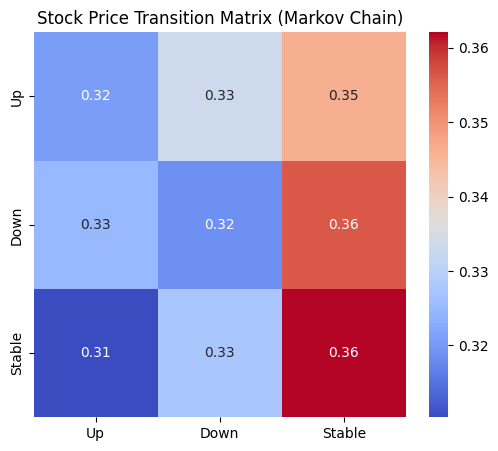

In [162]:
plt.figure(figsize=(6, 5))
sns.heatmap(transition_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Stock Price Transition Matrix (Markov Chain)")
plt.show()

In [163]:
print("transition_matrix:\n",transition_matrix)

transition_matrix:
               Up      Down    Stable
Up      0.320513  0.333333  0.346154
Down    0.325000  0.318750  0.356250
Stable  0.310345  0.327586  0.362069


Inference from Heatmap:
If today is Up, there's a 32.05% chance it stays Up, 33.33% chance it goes Down, and 34.61% chance it remains Stable.
If today is Down, there's a 31.88% chance it stays Down, 32.50% chance it moves Up, and 35.63% chance it stabilizes.
If today is Stable, there's a 31.03% chance it moves Up, 32.76% chance it goes Down, and 36.21% chance it stays Stable.

In [164]:
def simulate_stock_prices(data, transition_matrix, days=252):
    last_price = data['Close'].iloc[-1]  # Start from last known price
    current_state = data['state'].iloc[-1]  # Start from last known state
    
    future_prices = [last_price]
    future_states = [current_state]

    for _ in range(days):
        # Get next state based on transition probabilities
        next_state = np.random.choice(transition_matrix.columns, p=transition_matrix.loc[current_state])

        # Adjust price based on state
        if next_state == "Up":
            last_price *= np.random.uniform(1.005, 1.02)
        elif next_state == "Down":
            last_price *= np.random.uniform(0.98, 0.995)
        
        # Append values
        future_prices.append(last_price)
        future_states.append(next_state)
        current_state = next_state  # Move to next state

    return future_prices, future_states

In [165]:
future_prices, future_states = simulate_stock_prices(stock_data, transition_matrix, days=252)

future_dates = pd.date_range(start=stock_data.index[-1], periods=253, freq='B')

In [166]:
predicted_stock_data = pd.DataFrame({'Date': future_dates[:len(future_prices)], 
                                     'Predicted Price': future_prices, 
                                     'state': future_states})

In [167]:
predicted_stock_data

,Date,Predicted Price,state
0,2024-12-31,1215.449951,Stable
1,2025-01-01,1198.514720,Down
2,2025-01-02,1198.514720,Stable
3,2025-01-03,1175.946060,Down
4,2025-01-06,1153.360735,Down
...,...,...,...
248,2025-12-12,1548.840825,Stable
249,2025-12-15,1548.840825,Stable
250,2025-12-16,1548.840825,Stable
251,2025-12-17,1572.767033,Up


In [168]:
predicted_stock_data.reset_index(inplace=True)
print(predicted_stock_data.columns)  

Index(['index', 'Date', 'Predicted Price', 'state'], dtype='object')


In [169]:
predicted_stock_data["Date"] = pd.to_datetime(predicted_stock_data["Date"], errors="coerce")
predicted_stock_data.set_index("Date", inplace=True)


In [186]:
predicted_stock_data.loc["2025-03-07", "Predicted Price"].round(3)

1135.324

In [171]:
from datetime import datetime , timedelta

In [172]:
pred_start_date = "2023-01-01"  # Adjust as needed
pred_end_date = datetime.today().strftime('%Y-%m-%d')  # Today's date

In [173]:
actual_stock_data = yf.download(ticker, start=pred_start_date, end=pred_end_date)
actual_stock_data = actual_stock_data[['Close']]  # Keep only closing price
actual_stock_data.reset_index(inplace=True)

[*********************100%***********************]  1 of 1 completed


In [174]:
actual_stock_data.columns

MultiIndex([( 'Date',            ''),
            ('Close', 'RELIANCE.NS')],
           names=['Price', 'Ticker'])

In [175]:
actual_stock_data.columns = [col[0] if isinstance(col, tuple) else col for col in actual_stock_data.columns]

In [176]:
actual_stock_data.columns

Index(['Date', 'Close'], dtype='object')

In [177]:
actual_stock_data.head()

,Date,Close
0,2023-01-02,1172.422974
1,2023-01-03,1163.843262
2,2023-01-04,1146.320068
3,2023-01-05,1144.271851
4,2023-01-06,1154.672119


In [178]:
actual_stock_data.columns

Index(['Date', 'Close'], dtype='object')

In [180]:
predicted_stock_data.columns

Index(['index', 'Predicted Price', 'state'], dtype='object')

In [181]:
predicted_stock_data.head()

,index,Predicted Price,state
Date,,,
2024-12-31,0,1215.449951,Stable
2025-01-01,1,1198.514720,Down
2025-01-02,2,1198.514720,Stable
2025-01-03,3,1175.946060,Down
2025-01-06,4,1153.360735,Down
